# HW #1: Visualization and Analysis

**Edwin Ramirez & Darshil Desai <br> 
January 2019**

## Report Overview

This report focuses on exploring the _Suicide Rates Overview 1985 to 2016_ dataset sourced from [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016), which  is a compiled dataset from three separate sources. These sources include the [United Nations Development Program](http://hdr.undp.org/en/indicators/137506) and [World Bank](https://databank.worldbank.org/data/source/world-development-indicators#) for socioeconomic data, and the [World Health Organization](https://www.who.int/mental_health/prevention/suicide/suicideprevent/en/) for suicide data. 

Brielfy we will explore: 

- **(1)** The underlying relationship between a country's economic growth and the average suicide rate over time. Due to the fact that the current dataset contains data comprising over 100 countries, we limit this particular analysis to 4 countries wherein 2 will possess high GDP per capita and the other 2 will be among the lowest. 


- **(2)** Varying trends between male and female suicide rates over time: Discrepencies between suicide rates between male and female populations is a common trend in different parts of the world. For instance, in the United States the rate of suicide is highest in middle age men. Considereing this phenomenon, our analysis will look to explore the extent to which this difference is consistent throughout different parts of the world. Is it the case that male suicide numbers triumph over female suicide numbers globally or do cultural and societal differences in different parts of the world play a role in determining these numbers differently. 


- **(3)** Compare the chages in suicide rates for each generation over time. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import os

#set the working directory
try:
    os.chdir('./suicide-rates-overview-1985-to-2016')
except: 
    print ('Path already set')
    
path = os.getcwd()
print(path)


data = DataFrame(pd.read_csv("master.csv"))
col_names = list(data.columns.values)
print(col_names)

C:\Users\Darshil\Pacific\Semester 2\Data Viz\Assignments\HW1\anlt232_hw1\suicide-rates-overview-1985-to-2016


### Data Cleaning 

Before we move forward with our analysis, we will perform some minor data cleaning operations as follows: 

- 1. Drop the _HDI for year_ column which conveys information on the human development index. We do this due to the absence of over 50% of the missing data

- 2. Convert _gdp-for-year_ into a numeric column. This allows us to perform groupby operations on the dataset by aggregrating the column in different ways

In [30]:
#1. Removing the HDI for year column

try:
    data = data.drop(['HDI for year'], axis=1)
    print ('dropped')   
except:
    print ('already dropped')
    
# 2. Converting gdp_for_year column into a numeric one
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].str.replace(',','')

already dropped


# Exploring the Dataset

Our dataset contains data pertaining to suicides rates that have occured all over the world between the years 1990 and 2015. The variables / features that we possess are as follows: 

- **Country:** The country associated with the suicide record. 


- **Year:** The year associated with the suicide record


- **Sex:** The sex of the individual associated with the suicide record


- **Suicides_no:** Number of suicides 


- **Population:** Total population of the country which the particular record belongs to


- **Suicides/100k pop:** Number of suicides for every 100,000 members of the country's population.   


- **Gdp_per_year:** GDP value of the country in the year in which the suicide occurs. GDP stands for Gross Domestic Product, it refers to a monetary value of economic activity within a country. In simple terms, it can be calculated by summing up the market values of goods and services produced in the economy in any given time frame. The larger this number, the better the a country's economy 


- **Gdp_per_capita:** GDP per capita value of the country in the year in which the suicide occurs. GDP per capita refers to the Gross Domestic per capita which broadly measures a country's standard of living. The larger this number the better the quality of life. 


- **Generation:** Specifies one of the 5 generation groups namely Boomers (also known as Baby Boomers), G.I Generation, Generation X, Millenials and Silent. Individuals are grouped in any given generation based on the year of birth. The allocation is as follows:

    - GI Generation: refers to people who were born between 1901 and 1924
    - Silent: refers to people who were born between 1925 and 1942
    - Boomers: refers to people who were born between 1943 and 1964
    - Generation X: refers to people who were born between 1965 and 1979
    - Millenials: refers to people who were born between 1980 and 2000
    - Generation Z: refers to people who were born between 2001 and 2013
    
    Although the exact year ranges for a given generation may vary from year to year, we choose to refer to the following source as the ground truth: [National Public Radio Article](https://www.npr.org/2014/10/06/349316543/don-t-label-me-origins-of-generational-names-and-why-we-use-them)

In [33]:
#viewing our data
data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,2156624900,796,Generation X


In [34]:
#Basic analysis 
age_groups = pd.DataFrame(data['age'].value_counts(dropna=False)).sort_values('age')
gen = pd.DataFrame(data['generation'].value_counts(dropna=False))
countries = pd.DataFrame(data['country'].value_counts(dropna=False))
gender = pd.DataFrame(data['sex'].value_counts(dropna=False))

# Some Group-bys to help with certain visualizations

# Average GDP_per_capita per country per year
data.groupby(['country', 'year'])['gdp_per_capita ($)'].mean()

#Average number of suicides per country per year
aa = pd.DataFrame(data.groupby(['country', 'year'])['suicides_no','gdp_per_capita ($)' ].mean())

#distrubution ofage brackets per country
count_age  = data.groupby(['country', 'age'])['age'].count()

# Average population per country in 100s
avg_pop_bycountry = round(pd.DataFrame(data.groupby(['country'])['population'].mean())/100,0)

#average GDP value in the following countries: United States|Sweden|Sri Lanka|Armenia|Albania
gdp_per_country = round(pd.DataFrame(data[data['country'].str.contains('United States|Sweden|Sri Lanka|Armenia|Ukraine')].groupby(['country'])['gdp_per_capita ($)'].mean())/100,0).sort_values('gdp_per_capita ($)')

selected_countries = data[data['country'].str.contains('United States|Sweden|Sri Lanka|Armenia|Albania')]       

vv = round(pd.DataFrame(data[data['country'].str.contains('United States|Sweden|Sri Lanka|Armenia|Ukraine')].groupby(['country', 'sex'])['suicides_no'].mean()),0).apply(lambda x: x.to_json(orient='records'))

## Visualizing our dataset

- Some basic visuals showcasing the type of data we have etc etc 

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 5.]),
 array([4610. , 4613.2, 4616.4, 4619.6, 4622.8, 4626. , 4629.2, 4632.4,
        4635.6, 4638.8, 4642. ]),
 <a list of 10 Patch objects>)

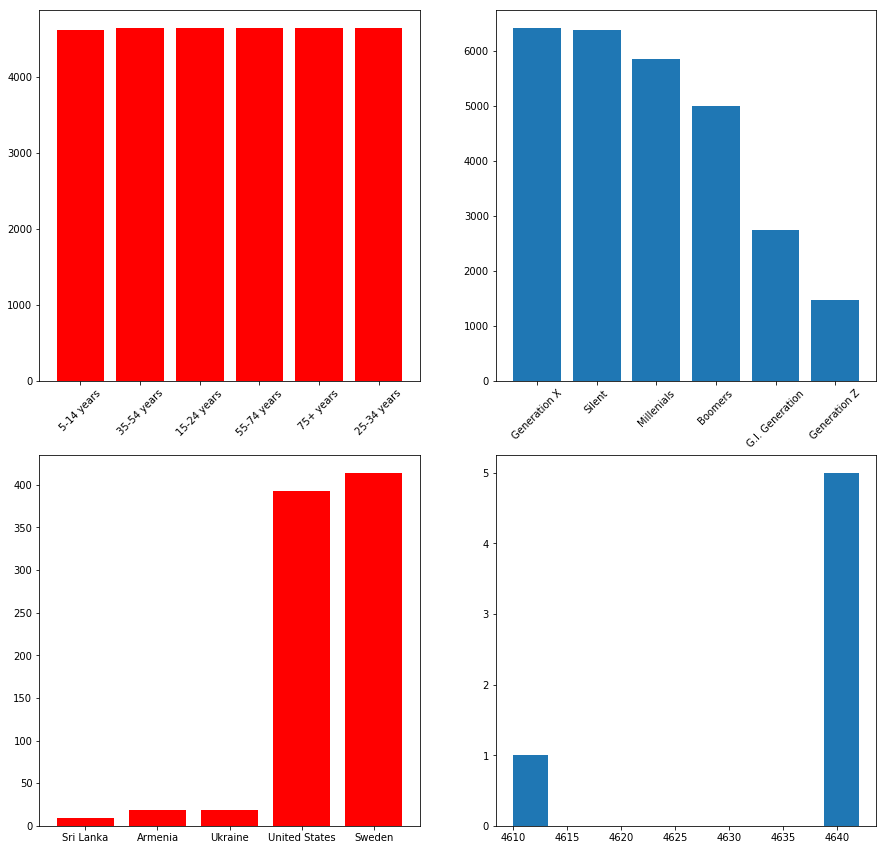

In [67]:
plt.figure(figsize=(15,15))

#Proportion of overall male vs female
plt.subplot(2,2,1)
plt.bar(list(age_groups.index),age_groups['age'], color='r')
plt.xticks(rotation=45)

# Distrubution of diff generations
plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.bar(list(gen.index),gen['generation'])

# Comparing mean GDP across selected countries
plt.subplot(2,2,3)
plt.bar(list(gdp_per_country.index),gdp_per_country['gdp_per_capita ($)'], color='red')

#
plt.subplot(2,2,4)
plt.pie(age_groups['age'], labels = list(age_groups.index), autopct='%1.0f%%', pctdistance=0.5)

# Hypothesis and Analysis

## Claim 1 : Relationship between Economic Growth & Suicide Rates

We will try and determine the strength of the relationship between a countrys' economic growth (measured by the GDP per capita) and the the average suicide rate over time. As our claim we would like to hypothesize that economic downturn in wealthier countries yields proportionally less hardship amongst its constituents and therefore smaller change in suicide rates as compared to poorer countries where economic downturn will yield proportionally more hardship amongst its constituents and therefore larger change in suicide rates. 

Briefly we will pursue this analysis as follows:
- (i) We will compare and examine the changing average global GDP per capita and the resultant suicide rate over the years

- (ii) Following which we will compare the same metrics but between countries with a high GDP and countries with low GDP. 

### (i) Global Scale: Comparing GDP per capita growth and overall suicide rates

We begin examing our first claim by briefly comparing the global GDP per capita growth and global suicide rates between the years 1985 to 2016. Here we aim to explore the question: in general all over the world is there a non-causal or causal relationship between improving or deteriorating economic trends and suicide rates?

Based on the visual data graphed below, it is interesting to observe an inverse correlation between the 2 factors. Particularily we observe the following: 
- A steady growth in GDP per capital between the years 1990 and 1995 is followed by a decreasing rate of change in annual suicide rates in the same time period. I.e: the suicide rate seems to keep on increasing but at a rate much slower than the previous years


- The time period between 1995 and 2010 shows the global GDP per capita consistently growing whilst simultaneously experiencing a gradual decrease in average suicide rates. This time period is where a non-causal relationship could be established simply based on the visual evidence the data provides. 


- The time period between 2010 and 2015 shows the negative rate of change in average number of suicides gradually diminishing and moving towards a positive rate of change, thus implying that an increase in the average number of suicides. A possible explanation for this phenomenon could be attributed to the possible spillover economic effects of the global 2008 financial slowdown among many other factors. Although the given data does not allow us to attribute this trend in average suicide rate entirely to the financial turmoil, it gives us enough evidence to assert that there may be an inverse relationship between GDP per capita growth and suicide rates.

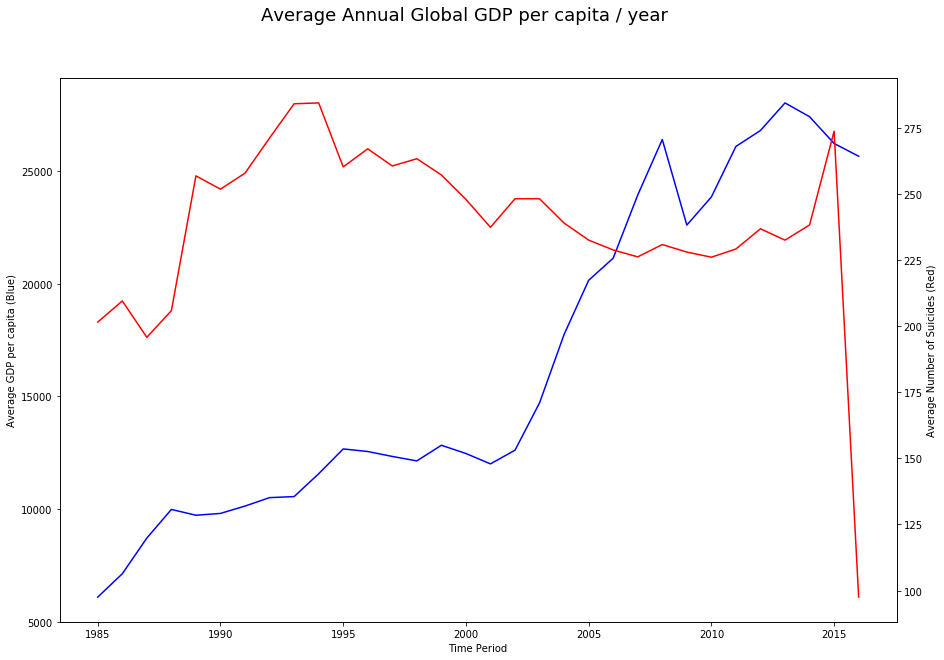

In [11]:
plt.figure(figsize=(15,10))
plt.suptitle('Average Annual Global GDP per capita / year', fontsize=18)
plt.xlabel('Time Period')
plt.ylabel('Average GDP per capita (Blue)')

plt.plot(data.groupby('year')['gdp_per_capita ($)'].mean(), c='blue')
plt.twinx()  # initialize a second axis 
plt.ylabel('Average Number of Suicides (Red)')
plt.plot(data.groupby('year')['suicides_no'].mean(), c='red')

### (ii) Narrowing Down the Analysis: Comparing GDP per capita growth and suicide rates in selected countries

Although we were generally able to establish a simplistic non-causal relationship between the GDP per capita and changing suicide rates on a global scale, it is important to acknowledge the difference in proportional effects of economic growth on a country's average annual suicide rate.  We will pursue exploring our hypothesis that the effect of a nation's economic activity on its annual suicide rates will vary considerably based on the wealth and status of a country.  For instance: an economic downtown in a wealthy country such as the United States may observe a proportionally smaller change in the average annual number of suicides as opposed to a poorer country such as Armenia or Albania. 

In order to examine this claim we will compare the change in GDP per capita with the average annual suicide rate between 2 wealthy countries and 2 relatively poorer countries.

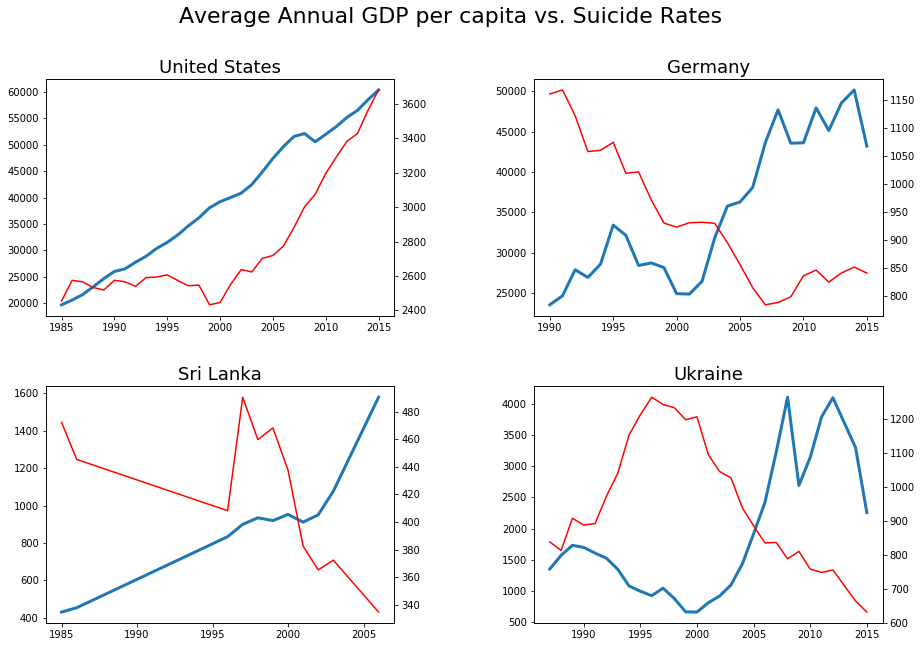

In [12]:
"""
Simple function to help graph comparitive line plots between average GDP per capita and the average annual suicide rates. 

Parameters: 4 countries each being c1, c2, c3 and c4 respectively 
"""

def compare_plot(c1,c2,c3,c4):    
    plt.figure(figsize=(15,10))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.3)
    
    #---------------------------------------------
    plt.subplot(2,2,1)
    # Figure title
    plt.suptitle('Average Annual GDP per capita vs. Suicide Rates', fontsize=22)

    # First plot
    plt.title('{}'.format(c1),fontsize=18 )
    plt.plot(data[data['country'].str.contains(c1)].groupby('year')['gdp_per_capita ($)'].mean(),linewidth=3.0)
    ## Examining Claim 1 )

    plt.twinx()  # initialize a second axis 
    plt.plot(data[(data['country'].str.contains(c1))].groupby('year')['suicides_no'].mean(), c = 'red')
    

    #---------------------------------------------
    plt.subplot(2,2,2)

    plt.title('{}'.format(c2),fontsize=18 )
    plt.plot(data[data['country'].str.contains(c2)].groupby('year')['gdp_per_capita ($)'].mean(),linewidth=3.0)

    # Second plot
    plt.twinx()  # initialize a second axis 
    plt.plot(data[(data['country'].str.contains(c2))].groupby('year')['suicides_no'].mean(), c = 'red')
    
    #---------------------------------------------
    plt.subplot(2,2,3)

    plt.title('{}'.format(c3),fontsize=18 )
    plt.plot(data[data['country'].str.contains(c3)].groupby('year')['gdp_per_capita ($)'].mean(),linewidth=3.0)

    # Second plot
    plt.twinx()  # initialize a second axis 
    plt.plot(data[(data['country'].str.contains(c3))].groupby('year')['suicides_no'].mean(), c = 'red')
    
    #---------------------------------------------
    plt.subplot(2,2,4)
    
    plt.title('{}'.format(c4),fontsize=18 )
    plt.plot(data[data['country'].str.contains(c4)].groupby('year')['gdp_per_capita ($)'].mean(),linewidth=3.0)

    # Second plot
    plt.twinx()  # initialize a second axis 
    plt.plot(data[(data['country'].str.contains(c4))].groupby('year')['suicides_no'].mean(), c = 'red')
    
    #insert any 4 countries to compare
compare_plot('United States', 'Germany', 'Sri Lanka', 'Ukraine')

The visual analysis comparing GDP per capita and suicide rates between different countries yield interesting observations: 

- _United States:_ there seems to be no effect of the increasing GDP per capita value on the average annual suicide rate. 

- _Germany:_ Here we see some resemblance of correlation between the 2 metrics. Overall the country's experiences increasing GDP per capita value whilst simultaneously also experiencing a gradual decrease in average suicide rates over the time period. It may be important to note that the shrot period of pullback between the years 1995 and 2000 do not affect in any way the decreasing suicide rates 

- _Sri Lanka:_ In the case of Sri Lanka the overall the GDP per capita and annual suicide rates experience an overall increase and decrease respectively. However it is important to note time period between 1995 and 2000 during which there occurs a slowdown in GDP per capita value and a sudden increase in the annual suicide rate. 

- _Ukraine:_ Here there is a clearer presence of an inverse relationship between the 2 metrics. Unfavorable economic events during the time period between 1990 and 1997 experiences increasing suicide rates followed by a gradual decline as the GDP per vapita value begins to bottom out before increasing again. 

**Conclusion:** We can sufficiently conclude, based on the given data and visual analysis, to have enough evidence to support our claim that economic downturns affect the suicide rate between wealthier and poorer nations differently. 

## Claim 2: Comparing Suicides Rates Between Men & Women

In this case we will try and answer the question: are varying suicide rates between men and women the same throughout the world or is it the case that cultural and societal differences lead these numbers and the proportions to be different in different parts of the world? By performing visual analysis on our dataset, we will compare suicide rates between male and female populations in countries belonging to each one of the following regions- **North America, South America, Europe and the Far East (Asia)**. Furthermore we will examine whether these trends remain consistent over 15+ years

Our claim in this case is that throughout the world the male vs female suicide rates will disporportionally tip in favor of the male population. Cultural literature and history throughout the world has conveyed how males, given their self perceived masculine and mental strengh and individualism, are less likely to seek help from suicidal feelings. 

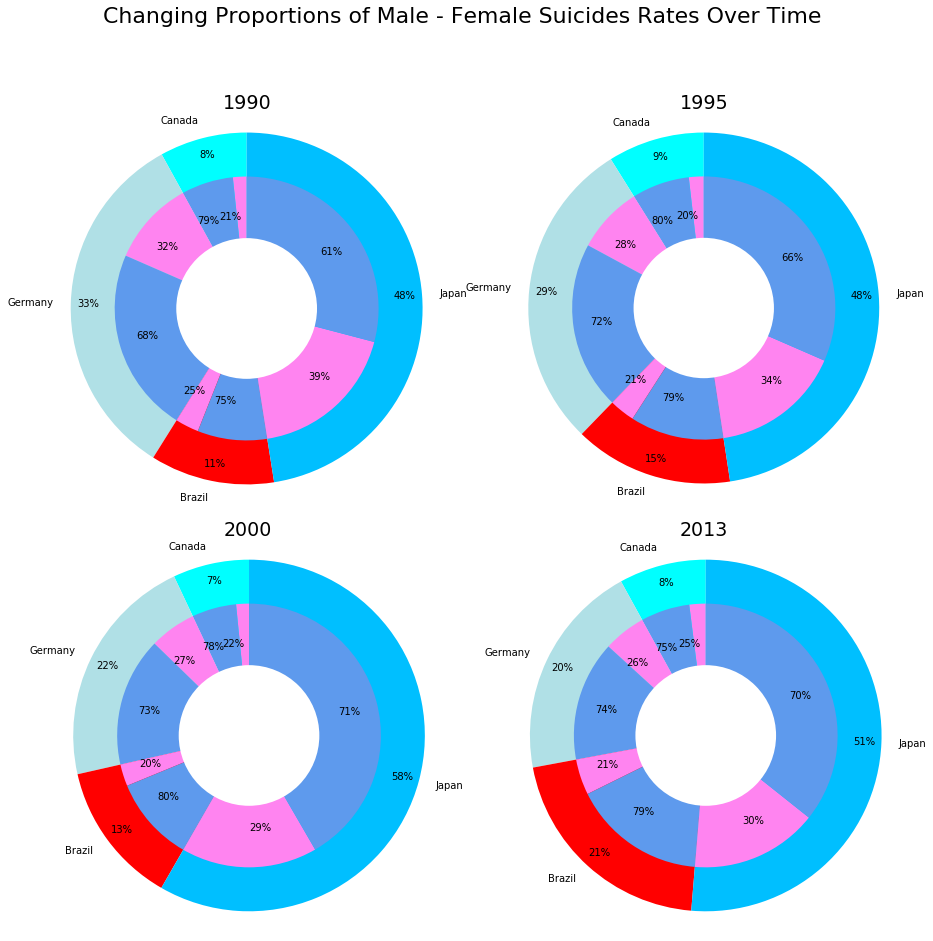

In [206]:

"""
2 Functions to assist with the following: 
(i) country_set_stats: 
    parameter- country name, year
    returns: Groupby object summing up make and feamle suicide numbers based on the year
    
(ii) nested_pie:
    parameter: years 1 to 4
    Returns: Nested pie charts showing % of male and female suicides over the years
"""

# (i)
def country_sex_stats(country, year):
    country_sex_stats = round(pd.DataFrame(data[ (data['country'].str.contains(country)) &
                                               (data['year']== year)].groupby(['country', 'year','sex'])['suicides_no'].sum()),0)
    
    total = country_sex_stats['suicides_no'].sum()
    return country_sex_stats, total
#---------------------------------------------

# (ii)

def nested_pie(year1, year2, year3, year4):

    plt.figure(figsize=(15,15))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.1)
      
    labels = ['Canada', 'Germany','Brazil','Japan' ]
 
    #global color scheme
    colors = ['aqua', 'powderblue', 'r', 'deepskyblue']
    colors_gender = ['#ff84f0','#5e9aed', '#ff84f0','#5e9aed', '#ff84f0','#5e9aed', '#ff84f0','#5e9aed']

    for cc,i,y in zip(['STAY_EMPTY','Canada', 'Germany','Brazil','Japan' ], range(1,5),[year1, year2, year3, year4]):
        
        plt.subplot(2,2,i)
        plt.title('{}'.format(y), fontsize=19)
        
        sizes = [country_sex_stats(labels[0], y)[1], country_sex_stats(labels[1], y)[1], 
                 country_sex_stats(labels[2], y)[1], country_sex_stats(labels[3], y)[1]]

        labels_gender = ['Woman','Man','Woman','Man','Woman','Man','Woman','Man']
        
        #labels for the inner pie
        sizes_gender = []
        sizes_gender_pct = []
        
        for x in labels:
            zz = list(country_sex_stats(x, y)[0]['suicides_no'])
            sizes_gender.extend(zz)
        
            sizes_gender_pct_e = [x/sum(zz) for x in zz]       
            sizes_gender_pct.extend(sizes_gender_pct_e)
            
        sizes_gender_pct = [str(round(x*100,None))+'%' for x in sizes_gender_pct]
        
                
        colors = colors
        colors_gender = colors_gender

        # Plot each subplot
        plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, autopct='%1.0f%%', pctdistance=0.9)
        plt.pie(sizes_gender,labels =sizes_gender_pct , colors=colors_gender,radius=0.75,startangle=90, labeldistance=0.70)

        centre_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=0)
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)

        plt.axis('equal')
        
    plt.suptitle('Changing Proportions of Male - Female Suicides Rates Over Time', fontsize=22)
    plt.show()
    

    
nested_pie(1990,1995,2000,2013)

We employ the use of nested pie charts to arrive at some interesting conclusions and tackle our claim: 
- First we look to examining the changing proportions of suicide rates among the selected countries from various parts of the world. 
It is important to note how North American countries like **Canada** have managed to maintain a constant rate of annual suicides relative to the other 4 countries. Whilst on one hand this number looks promising one could argue that the no significant progress in suicide prevention  is visible which would have perhaps lowered this number over the 13 year time period.  

    On the other hand European countries such as **Germany** seem to have made significant strides in lowering the overall annual suicide rate over the term of 10+ years relative to the other 4 countries. Suicide rates in **Brazil** seem to have skyrocketed and **Japan** manages to maintain a stable but unimproving annual suicide rate as well. 


- Next we look to examining our claim being that the proportion of male vs female suicides remains consistent throughout different parts of the world irrespective of cultural and societal differences. Using visual evidence we can observe that the proportion of suicides between the male and female population across the globe has largely been in favor of males.  It is also interesting to note how the respective proportion sizes have not changed over the time period. In conclusion we can support the claim despite a myriad of differences between the countries we have chosen , there exists a repeating phenomenon of male suicide rates being disproportionally higher than female suicide rates over the 13 year time period chosen

## Claim 3: Varying Suicides Rates Between Generations 

Get only US data... group by generation and suicides/100k pop...take the totals of suicides per generation in 10 year increments.

Earlier we made a claim that we believed that the data would show that millenials would have the.... Darsh dont worry about all this but this is going to be a very long explanation on my end. Essentially the standard for suicide rates is the suicide/100k variable...so essentially im taking the average rates within 10 year increments. First i analyze the 3 time periods...with all generations separated....Then the final bar chart is the average of all generations combined during these time periods(i.e. the general population regardless of age). Im going to write a lot about this...like for example on my last bottom plot you could say that the average suicide rate between 2005-2014 was around 15 for Sweden which is actually very accurate...I believe the actual number was 17.5 in 2011. Anyways I'll cite some sources...Im going to comment my code too. And go into detail of the names of each generation to give extra context to why some may experience higher rates than other...like the silent generation growing up during World War 2. Either way this is my code and essentially the claim I wanted to present.

**G.I. Generation: 1900-1924**

**Silent Generation: 1925-1944**

**Boomers: 1945-1964**

**Generation X: 1965-1980**

**Millenials: 1981-1996**

In [68]:
US_data = selected_countries.loc[selected_countries['country'] == "United States",]

In [69]:
US_gen1 = US_data.loc[US_data['year'] < 1995,] 
US_gen1 = pd.DataFrame(US_gen1.groupby('generation')['suicides/100k pop'].mean())

US_gen2 = US_data.loc[(US_data['year'] > 1994) & (US_data['year'] < 2005),] 
US_gen2 = pd.DataFrame(US_gen2.groupby('generation')['suicides/100k pop'].mean())

US_gen3 = US_data.loc[(US_data['year'] > 2004) & (US_data['year'] < 2015),]
US_gen3 = pd.DataFrame(US_gen3.groupby('generation')['suicides/100k pop'].mean())

In [70]:
SW_data = selected_countries.loc[selected_countries['country'] == "Sweden",]

SW_gen1 = SW_data.loc[SW_data['year'] < 1995,] 
SW_gen1 = pd.DataFrame(SW_gen1.groupby('generation')['suicides/100k pop'].mean())

SW_gen2 = SW_data.loc[(SW_data['year'] > 1994) & (SW_data['year'] < 2005),] 
SW_gen2 = pd.DataFrame(SW_gen2.groupby('generation')['suicides/100k pop'].mean())

SW_gen3 = SW_data.loc[(SW_data['year'] > 2004) & (SW_data['year'] < 2015),] 
SW_gen3 = pd.DataFrame(SW_gen3.groupby('generation')['suicides/100k pop'].mean())

In [71]:
AL_data = selected_countries.loc[selected_countries['country'] == "Albania",]

AL_gen1 = AL_data.loc[AL_data['year'] < 1995,] 
AL_gen1 = pd.DataFrame(AL_gen1.groupby('generation')['suicides/100k pop'].mean())

AL_gen2 = AL_data.loc[(AL_data['year'] > 1995) & (AL_data['year'] < 2006),] 
AL_gen2 = pd.DataFrame(AL_gen2.groupby('generation')['suicides/100k pop'].mean())

AL_gen3 = AL_data.loc[(AL_data['year'] > 2005) & (AL_data['year'] < 2016),] 
AL_gen3 = pd.DataFrame(AL_gen3.groupby('generation')['suicides/100k pop'].mean())

In [72]:
AR_data = selected_countries.loc[selected_countries['country'] == "Armenia",]

AR_gen1 = AR_data.loc[AR_data['year'] < 1995,] 
AR_gen1 = pd.DataFrame(AR_gen1.groupby('generation')['suicides/100k pop'].mean())

AR_gen2 = AR_data.loc[(AR_data['year'] > 1994) & (AR_data['year'] < 2005),] 
AR_gen2 = pd.DataFrame(AR_gen2.groupby('generation')['suicides/100k pop'].mean())

AR_gen3 = AR_data.loc[(AR_data['year'] > 2004) & (AR_data['year'] < 2015),] 
AR_gen3 = pd.DataFrame(AR_gen3.groupby('generation')['suicides/100k pop'].mean())

In [73]:
US_gen1

,suicides/100k pop
generation,
Boomers,15.148571
G.I. Generation,25.938125
Generation X,8.427188
Millenials,0.821250
Silent,15.612500


In [74]:
SW_gen1

,suicides/100k pop
generation,
Boomers,19.417917
G.I. Generation,30.342917
Generation X,7.131667
Millenials,0.297500
Silent,23.134375


In [75]:
AL_gen1

,suicides/100k pop
generation,
Boomers,2.378889
G.I. Generation,3.001667
Generation X,2.570556
Millenials,0.138333
Silent,3.041667


In [76]:
AR_gen1

,suicides/100k pop
generation,
Boomers,3.417778
G.I. Generation,8.874167
Generation X,1.400833
Millenials,0.098750
Silent,6.002000


In [77]:
AR_gen1.index

Index(['Boomers', 'G.I. Generation', 'Generation X', 'Millenials', 'Silent'], dtype='object', name='generation')

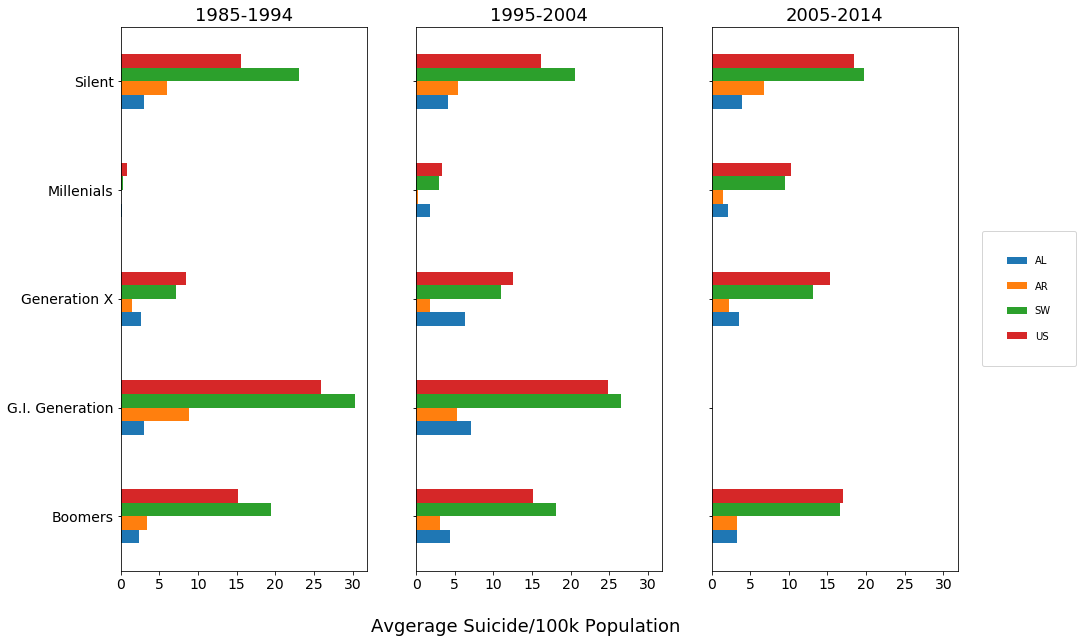

In [78]:
index = ['Boomers', 'G.I. Generation', 'Generation X', 'Millenials', 'Silent']
gen1_df = pd.DataFrame({'US': US_gen1.iloc[:,0],
                        'SW': SW_gen1.iloc[:,0],
                        'AL': AL_gen1.iloc[:,0],
                        'AR': AR_gen1.iloc[:,0]}, index=index)

gen2_df = pd.DataFrame({'US': US_gen2.iloc[:,0],
                        'SW': SW_gen2.iloc[:,0],
                        'AL': AL_gen2.iloc[:,0],
                        'AR': AR_gen2.iloc[:,0]}, index=index)


gen3_df = pd.DataFrame({'US': US_gen3.iloc[:,0],
                        'SW': SW_gen3.iloc[:,0],
                        'AL': AL_gen3.iloc[:,0],
                        'AR': AR_gen3.iloc[:,0]}, index=index)

fig, (ax,ax2,ax3) = plt.subplots(ncols = 3, sharey=True, sharex=True, figsize = (15,10))

gen1_df.plot.barh(ax=ax, legend=False, fontsize = 14)
gen2_df.plot.barh(ax=ax2, legend=False, fontsize = 14)
gen3_df.plot.barh(ax=ax3, legend=False, fontsize = 14)

ax3.legend(bbox_to_anchor=(1.5, 0.5), loc='right', ncol=1 , borderpad=2.5, labelspacing=1.5)
ax.set_title("1985-1994", fontsize = 18)
ax2.set_title("1995-2004", fontsize = 18)
ax3.set_title("2005-2014", fontsize = 18)
fig.text(0.5, 0.04, 'Avgerage Suicide/100k Population', ha='center', fontsize = 18)
plt.show()

In [79]:
US_tot1 = round(gen1_df.loc[:,'US'].mean(),2)
US_tot2 = round(gen2_df.loc[:,'US'].mean(),2)
US_tot3 = round(gen2_df.loc[:,'US'].mean(),2)
US_tot = [US_tot1, US_tot2, US_tot3]

SW_tot1 = round(gen1_df.loc[:,'SW'].mean(),2)
SW_tot2 = round(gen2_df.loc[:,'SW'].mean(),2)
SW_tot3 = round(gen3_df.loc[:,'SW'].mean(),2)
SW_tot = [SW_tot1, SW_tot2, SW_tot3]

AL_tot1 = round(gen1_df.loc[:,'AL'].mean(),2)
AL_tot2 = round(gen2_df.loc[:,'AL'].mean(),2)
AL_tot3 = round(gen3_df.loc[:,'AL'].mean(),2)
AL_tot = [AL_tot1, AL_tot2, AL_tot3]

AR_tot1 = round(gen1_df.loc[:,'AR'].mean(),2)
AR_tot2 = round(gen2_df.loc[:,'AR'].mean(),2)
AR_tot3 = round(gen3_df.loc[:,'AR'].mean(),2)
AR_tot = [AR_tot1, AR_tot2, AR_tot3]

period = ["1985-1994", "1995-2004", "2005-2015"]
total = pd.DataFrame({'US': US_tot,
                        'SW': SW_tot,
                        'AL': AL_tot,
                        'AR': AR_tot}, index=period)

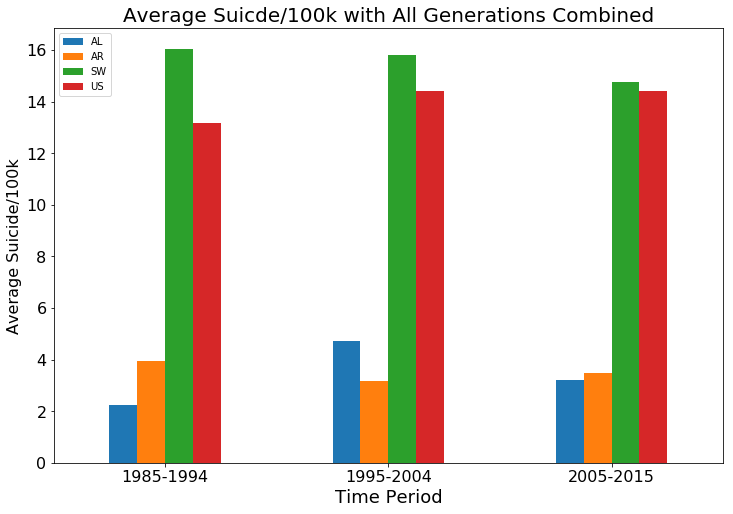

In [80]:
fig,ax = plt.subplots(ncols = 1, figsize = (12,8))
total.plot.bar(ax=ax, rot=0, fontsize = 16)
ax.set_title("Average Suicde/100k with All Generations Combined", fontsize = 20)
ax.set_ylabel("Average Suicide/100k", fontsize = 16)
ax.set_xlabel("Time Period", fontsize = 18)
plt.show()

# Appendix

In [154]:
v = round(pd.DataFrame(data[data['country'].str.contains('United States|Sweden|Sri Lanka|Armenia|Ukraine')].groupby(['country', 'year','sex'])['suicides_no'].sum()),0)
vv = round(pd.DataFrame(data[data['country'].str.contains('United States|Sweden|Sri Lanka|Armenia|Ukraine')].groupby(['country', 'sex'])['suicides_no'].mean()),0).apply(lambda x: x.to_json(orient='records'))

pd.DataFrame(data[data['country'].str.contains('United States|Sweden|Sri Lanka|Armenia|Ukraine')].groupby(['country'])['population'].sum())/100

,population
country,
Armenia,773481.73
Sri Lanka,1825256.26
Sweden,2532971.31
Ukraine,12864691.84
United States,80540272.01


In [ ]:
"""
ARCHIVE: I redid the function to make in dynamic so as to not code up each subplot. This section is just for backup until we complete the assignment


def country_sex_stats(country, year):
    country_sex_stats = round(pd.DataFrame(data[ (data['country'].str.contains(country)) &
                                               (data['year']== year)].groupby(['country', 'year','sex'])['suicides_no'].sum()),0)
    
    total = country_sex_stats['suicides_no'].sum()
    return country_sex_stats, total



def nested_pie(year1, year2, year3, year4):

    plt.figure(figsize=(15,12))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
    labels = ['Canada', 'Finland','Germany','Sweden']
    
    #global color scheme
    colors = ['aqua', 'blue', 'r', 'deepskyblue']
    colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
    
      
    plt.subplot(2,2,1)
    sizes = [country_sex_stats(labels[0], year1)[1], country_sex_stats(labels[1], year1)[1], 
             country_sex_stats(labels[2], year1)[1], country_sex_stats(labels[3], year1)[1]]

    labels_gender = ['Man','Woman','Man','Woman','Man','Woman','Man','Woman']
    sizes_gender = []
    for x in labels:
        zz = list(country_sex_stats(x, year1)[0]['suicides_no'])
        sizes_gender.extend(zz)

    colors = colors
    colors_gender = colors_gender

    # Plot
    plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
    plt.pie(sizes_gender,labels =sizes_gender , colors=colors_gender,radius=0.75,startangle=90)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
    plt.tight_layout()

    #----------------------------------------
    plt.subplot(2,2,2)

    sizes = [country_sex_stats(labels[0], year2)[1], country_sex_stats(labels[1], year2)[1], 
             country_sex_stats(labels[2], year2)[1], country_sex_stats(labels[3], year2)[1]]

    labels_gender = ['Man','Woman','Man','Woman','Man','Woman','Man','Woman']
    sizes_gender = []
    for x in labels:
        zz = list(country_sex_stats(x, year2)[0]['suicides_no'])
        sizes_gender.extend(zz)

    colors = colors
    colors_gender = colors_gender

    # Plot
    plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
    plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
    plt.tight_layout()

    #----------------------------------------
    plt.subplot(2,2,3)

    sizes = [country_sex_stats(labels[0], year3)[1], country_sex_stats(labels[1], year3)[1], 
             country_sex_stats(labels[2], year3)[1], country_sex_stats(labels[3], year3)[1]]

    labels_gender = ['Man','Woman','Man','Woman','Man','Woman','Man','Woman']
    sizes_gender = []
    for x in labels:
        zz = list(country_sex_stats(x, year3)[0]['suicides_no'])
        sizes_gender.extend(zz)

    colors = colors
    colors_gender = colors_gender

    # Plot
    plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
    plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
    plt.tight_layout()


    #----------------------------------------

    plt.subplot(2,2,4)

    sizes = [country_sex_stats(labels[0], year4)[1], country_sex_stats(labels[1], year4)[1], 
             country_sex_stats(labels[2], year4)[1], country_sex_stats(labels[3], year4)[1]]

    labels_gender = ['Man','Woman','Man','Woman','Man','Woman','Man','Woman']
    sizes_gender = []
    for x in labels:
        zz = list(country_sex_stats(x, year4)[0]['suicides_no'])
        sizes_gender.extend(zz)

    colors = colors
    colors_gender = colors_gender

    # Plot
    plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
    plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    
nested_pie(1990,1995,2000,2010)

"""